In [1]:
! pip install bnlp_toolkit
! pip install banglanltk
! pip install inltk
! pip install bnltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.9/966.9 kB 26.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.9/355.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 22.3 MB/s eta 0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=45747acd547aa3f1a17573848e3ed04d2a310cf46b8057e8d1aaf9956e2dc742
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=07ac1cf39614b45e4a1c8e5d5d1e47f82efa674d457d34587721721d37a0620a
  St

In [2]:
! pip install transformers

In [3]:
! pip install python-Levenshtein

In [4]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re 
from wordcloud import WordCloud
import string

from PIL import Image, ImageTk
from wordcloud.wordcloud import STOPWORDS
stopwords=set(STOPWORDS)
from collections import Counter
from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras.layers import Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

from sklearn.metrics import roc_curve, roc_auc_score
from bnlp.corpus import stopwords, punctuations, letters, digits
from sklearn.metrics import accuracy_score
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Input
from tqdm import tqdm
import pickle
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import itertools
from sklearn.utils import shuffle
from bnlp.corpus.util import remove_stopwords
from bnltk.stemmer import BanglaStemmer
import banglanltk as bn
from matplotlib import font_manager
from transformers import DistilBertTokenizer, TFDistilBertModel
import seaborn as sn
from tensorflow.keras.layers import Dense, GRU, Embedding
import warnings
warnings.simplefilter('ignore')
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
import transformers

from transformers import DistilBertTokenizer, DistilBertModel
import logging
logging.basicConfig(level=logging.ERROR)
from nltk.tokenize import word_tokenize
from nltk import FreqDist
%matplotlib inline


# Read Data

In [5]:
bangla_font_path="../input/bangla-fake-news-detection-dataset/Ador Noirrit Web.otf"
wordcloud_mask=np.array(Image.open("../input/bangla-fake-news-detection-dataset/twitter.png"))

In [6]:
df=pd.read_csv("/kaggle/input/bangla-fake-news-detection-dataset/final_bn_data.csv")

In [7]:
df.head()

,category,headline,content,label
0,National,৮ দিনে ১৮ বিল পাস!,দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত ...,0.0
1,Sports,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড,একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনি...,0.0
2,National,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে,গাজীপুরে জোড়া খুন মামলার প্রধান আসামি মাদ্রাসা...,0.0
3,Sports,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ,সাফ অনূর্ধ্ব-১৮ নারী ফুটবল চ্যাম্পিয়নশিপে নেপা...,1.0
4,National,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার,কুড়িগ্রাম প্রতিনিধি : কুড়িগ্রাম সদর উপজেলার বে...,1.0


In [8]:
df["category"].value_counts()

National         5321
International    1898
Sports           1858
Miscellaneous    1236
Editorial        1021
Politics          879
Entertainment     788
Lifestyle         342
Crime             335
Education         308
Finance           300
Technology        251
Name: category, dtype: int64

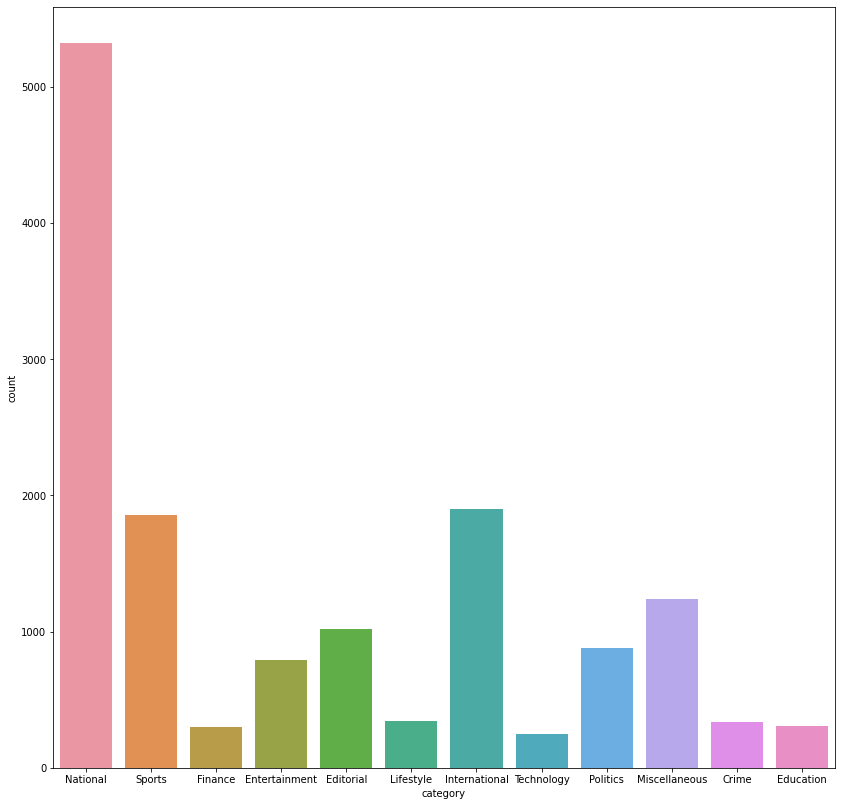

In [9]:
plt.figure(figsize=(14,14))

sns.countplot(x="category",data=df)
plt.show()

# Bangla stopwords,punctuations,letters,digits

In [10]:
from bnlp.corpus import stopwords, punctuations, letters, digits
print(stopwords)
print(punctuations)
print(letters)
print(digits)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [11]:
df1 = df.loc[df['label']==0]
df2 = df.loc[df['label']==1]
df3=df2.sample(10000,replace=True)
df4=df1.sample(10000,replace=True)

In [12]:
frames = [df3,df4]
result = pd.concat(frames)
#df = result.reindex()
bangla_data= result.sample(frac=1).reset_index(drop=True)
bangla_data['label'].astype(int).value_counts()

0    10000
1    10000
Name: label, dtype: int64

In [13]:
real_bangla = bangla_data[bangla_data['label'].astype(int) == 1]
fake_bangla = bangla_data[bangla_data['label'].astype(int) == 0]
real_bangla = real_bangla.sample(frac=1).reset_index(drop=True)
fake_bangla= fake_bangla.sample(frac=1).reset_index(drop=True)

# Fake Bangla Data Wordcloud

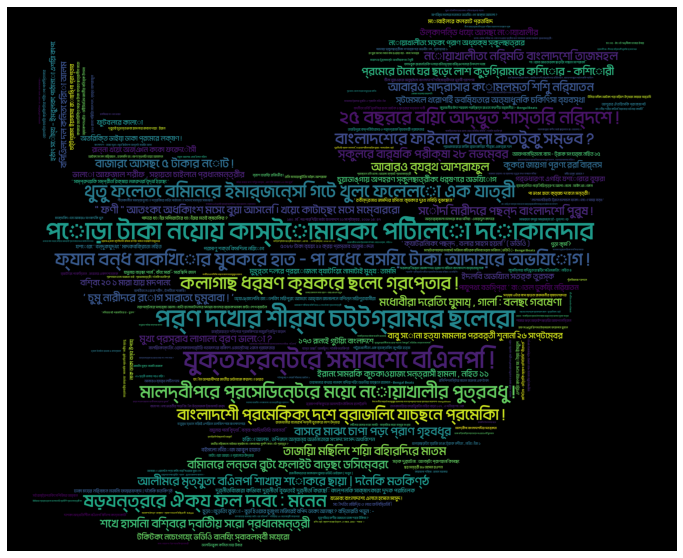

In [14]:
corpus = []
for i in range(0, len(fake_bangla)):
    review = re.sub(letters, ' ', (fake_bangla["headline"][i]))
    review = remove_stopwords(review, stopwords)
    review = ' '.join(review)
    corpus.append(review)
    
word_cloud_dict=Counter(corpus)
wordcloud = WordCloud(font_path=bangla_font_path,width = 1600, height = 800,mask=wordcloud_mask,background_color="black").generate_from_frequencies(word_cloud_dict)
plt.figure(figsize=(15,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

# Real Bangla Data  Wordcloud

In [15]:
corpus = []
for i in range(0, len(real_bangla)):
    review = re.sub(letters, ' ', (real_bangla["headline"][i]))
    review = remove_stopwords(review, stopwords)
    review = ' '.join(review)
    corpus.append(review)

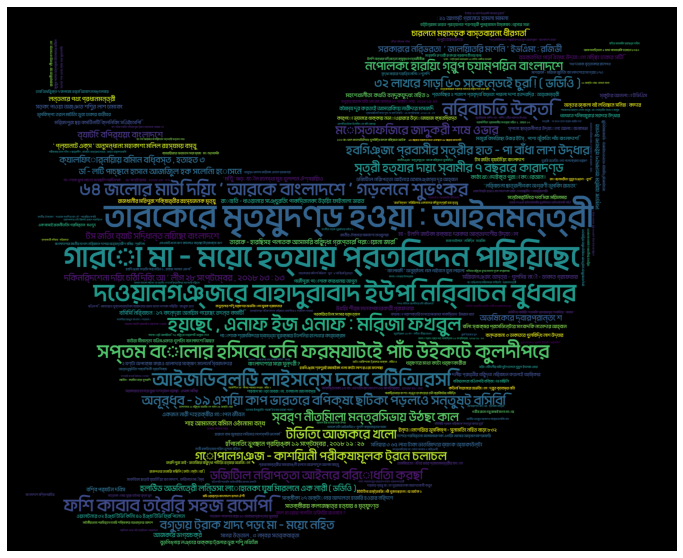

In [16]:
word_cloud_dict=Counter(corpus)
wordcloud = WordCloud(font_path=bangla_font_path,width = 1600, height = 800,mask=wordcloud_mask,background_color="black").generate_from_frequencies(word_cloud_dict)
plt.figure(figsize=(15,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [17]:
real_bangla["text"] =real_bangla["headline"]+" | "+ real_bangla["content"]
fake_bangla["text"] =fake_bangla["headline"]+" | "+ fake_bangla["content"]

In [18]:
real_bangla=real_bangla[["text","label"]]
fake_bangla=fake_bangla[["text","label"]]

In [19]:
real_bangla.head()

,text,label
0,"তফসিলের আগে বিএনপির ৭ দাবি, ১২ লক্ষ্য | তত্ত্ব...",1.0
1,দাবা অলিম্পিয়াডে রোমানিয়ার গ্র্যান্ডমাস্টারকে ...,1.0
2,ডিজিটাল নিরাপত্তা আইন নিয়ে মার্কিন রাষ্ট্রদূতে...,1.0
3,লন্ডনে হলো অষ্টম বাংলাদেশ বইমেলা উৎসব | লন্ডনে...,1.0
4,আওয়ামী লীগে চাঁদাবাজ ও দখলদারদের জায়গা নেই : স...,1.0



# দশটি সবচেয়ে ঘন ঘন শব্দ বাস্তব পাঠ্য

In [20]:
font_manager.fontManager.addfont(bangla_font_path)
prop = font_manager.FontProperties(fname=bangla_font_path)

In [21]:
corpus = []
for i in range(0, len(real_bangla)):
    review = real_bangla["text"].iloc[i]
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

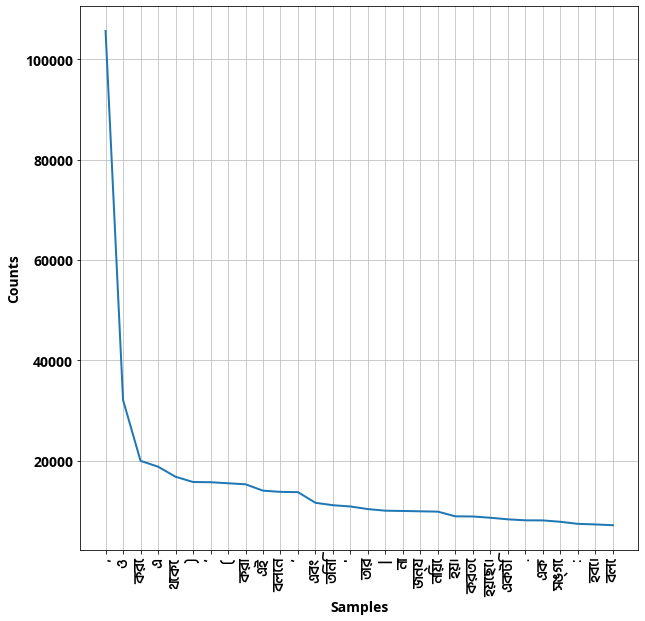

In [22]:
plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Li Ador Noirrit'
plt.rcParams['font.sans-serif'] = prop.get_name()

plt.rcParams.update({'font.size': 20})
tokenized_word=word_tokenize(str(corpus))
fdist = FreqDist(tokenized_word)
fdist.plot(30,cumulative=False)
plt.show()

# দশটি সবচেয়ে ঘন ঘন শব্দ নকল পাঠ্য

In [23]:
font_manager.fontManager.addfont(bangla_font_path)
prop = font_manager.FontProperties(fname=bangla_font_path)

In [24]:
corpus = []
for i in range(0, len(fake_bangla)):
    review = fake_bangla["text"].iloc[i]
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

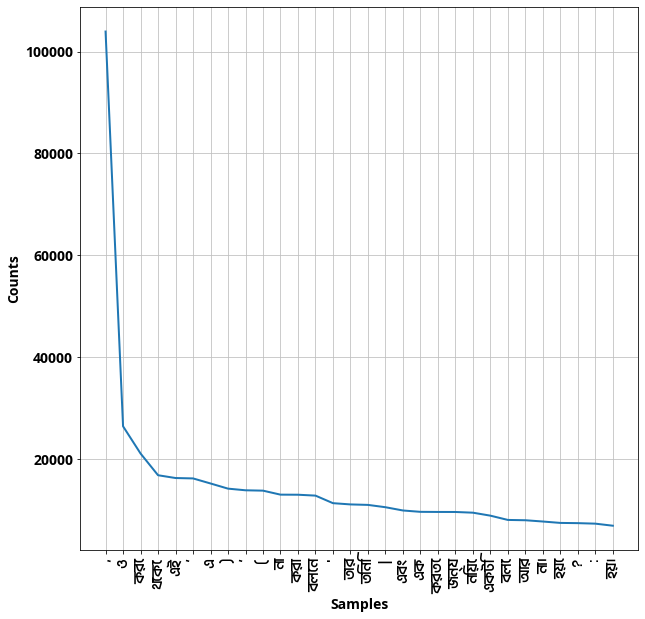

In [25]:
plt.rcParams['font.family'] = 'Li Ador Noirrit'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 20})
tokenized_word=word_tokenize(str(corpus))
fdist = FreqDist(tokenized_word)
fdist.plot(30,cumulative=False)
plt.show()

In [26]:
bangla_data=real_bangla.append(fake_bangla,ignore_index=True)

In [27]:
bangla_data['label'] = bangla_data['label'].astype(int)

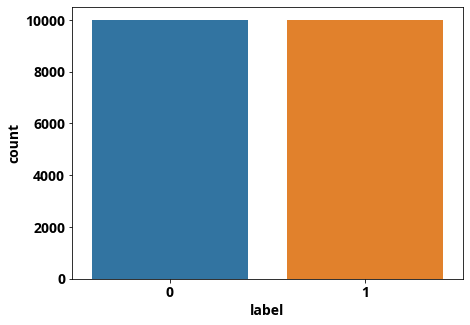

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(data=bangla_data,x="label")
plt.show()

In [29]:
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text
def remove_extra_whitespace_tabs(text):
   pattern = r'^\s*|\s\s*'
   return re.sub(pattern, ' ', text).strip()

In [30]:
def bn_lemmatization(text):

    #text1 = bn.stemmer(text)
    return bn.stemmer(text)

In [31]:

def remove_bn_stopwords(text):
    final_text = []
    text = remove_stopwords(text, stopwords)
        
    for word in text:
      text = remove_stopwords(word, stopwords)
      final_text.append(word)
    return " ".join(final_text)

# Cleaning Bangla data

In [32]:
def cleaning(text):
    # text = remove_html_tags(text)
    # #text = remove_bn_stopwords(text)
    # text = remove_punctuation(text)
    # text = remove_extra_whitespace_tabs(text)
    # #text = bn_lemmatization(text)
    return text

In [33]:
# bangla_data["text"]=bangla_data['text'].apply(cleaning)

In [34]:
bangla_data.head()

,text,label
0,"তফসিলের আগে বিএনপির ৭ দাবি, ১২ লক্ষ্য | তত্ত্ব...",1
1,দাবা অলিম্পিয়াডে রোমানিয়ার গ্র্যান্ডমাস্টারকে ...,1
2,ডিজিটাল নিরাপত্তা আইন নিয়ে মার্কিন রাষ্ট্রদূতে...,1
3,লন্ডনে হলো অষ্টম বাংলাদেশ বইমেলা উৎসব | লন্ডনে...,1
4,আওয়ামী লীগে চাঁদাবাজ ও দখলদারদের জায়গা নেই : স...,1


In [35]:
num_classes=len(bangla_data.label.unique())

In [36]:
bangla_data.head()

,text,label
0,"তফসিলের আগে বিএনপির ৭ দাবি, ১২ লক্ষ্য | তত্ত্ব...",1
1,দাবা অলিম্পিয়াডে রোমানিয়ার গ্র্যান্ডমাস্টারকে ...,1
2,ডিজিটাল নিরাপত্তা আইন নিয়ে মার্কিন রাষ্ট্রদূতে...,1
3,লন্ডনে হলো অষ্টম বাংলাদেশ বইমেলা উৎসব | লন্ডনে...,1
4,আওয়ামী লীগে চাঁদাবাজ ও দখলদারদের জায়গা নেই : স...,1


In [37]:
distil_bert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [38]:
distil_bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [39]:
max_len=40
sentences=bangla_data["text"]
labels=bangla_data["label"]
len(sentences),len(labels)

(20000, 20000)

In [40]:
distil_bert_input=distil_bert_tokenizer.encode_plus(sentences[0],add_special_tokens = True,max_length =40,pad_to_max_length = True,truncation=True)


In [41]:
distil_bert_input

{'input_ids': [101, 100, 1348, 29891, 29917, 1368, 29915, 29887, 29902, 29903, 29915, 29908, 100, 1364, 29914, 29904, 29915, 1010, 100, 1373, 29889, 29911, 29907, 1064, 1362, 29898, 29898, 29904, 29914, 29904, 29901, 29914, 29907, 29889, 1376, 29908, 29889, 29914, 29908, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [42]:
distil_bert_input['input_ids']

[101,
 100,
 1348,
 29891,
 29917,
 1368,
 29915,
 29887,
 29902,
 29903,
 29915,
 29908,
 100,
 1364,
 29914,
 29904,
 29915,
 1010,
 100,
 1373,
 29889,
 29911,
 29907,
 1064,
 1362,
 29898,
 29898,
 29904,
 29914,
 29904,
 29901,
 29914,
 29907,
 29889,
 1376,
 29908,
 29889,
 29914,
 29908,
 102]

In [43]:
input_id=np.asarray(distil_bert_input['input_ids'])
input_mask=np.asarray(distil_bert_input['attention_mask'])
out_put=distil_bert_model([input_id.reshape(1,-1),input_mask.reshape(1,-1)])
type(out_put)

transformers.modeling_tf_outputs.TFBaseModelOutput

In [44]:
out_put

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 40, 768), dtype=float32, numpy=
array([[[-0.04903847, -0.23558412, -0.42134947, ..., -0.22077028,
          0.880059  , -0.17129435],
        [-0.05751237, -0.20337038, -0.2605085 , ...,  0.04272785,
          0.6334994 , -0.4827452 ],
        [-0.10241587,  0.09395191, -0.05990165, ..., -0.32763308,
          0.5956104 , -0.4120626 ],
        ...,
        [ 0.08468276,  0.03189914, -0.38620472, ..., -0.61944634,
          0.43383646, -0.5916915 ],
        [ 0.7999437 , -0.30991226,  0.11346654, ..., -0.22190854,
          0.50582993, -1.0494398 ],
        [ 0.72774774,  0.1381182 , -0.55680186, ...,  0.0256767 ,
         -0.28899157, -0.48547944]]], dtype=float32)>, hidden_states=None, attentions=None)

In [45]:
distil_bert_tokenizer.decode(distil_bert_input['input_ids'])

'[CLS] [UNK] আগে বিএনপির [UNK] দাবি, [UNK] লকষয | তততবাবধাযক সরকার [SEP]'

# Encode Data

In [46]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    distil_bert_input_shape=distil_bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
    input_ids.append(distil_bert_input_shape['input_ids'])
    attention_masks.append(distil_bert_input_shape['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

In [47]:
len(input_ids),len(attention_masks),len(labels)

(20000, 20000, 20000)

In [48]:
print('Input shape {} \nAttention mask shape {} \nInput label shape {}'.format(input_ids.shape,attention_masks.shape,labels.shape))

Input shape (20000, 40) 
Attention mask shape (20000, 40) 
Input label shape (20000,)


In [49]:

X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.3,random_state=42,shuffle=True)

In [50]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))


Train input shape (14000, 40)
Test input shape (6000, 40)
Train label shape (14000,)
Test label shape (6000,)
Train attention mask shape (14000, 40)
Test attention mask shape (6000, 40)


# Create Distilbert Model With GRU Layer

In [51]:
def create_model():
    input_shape = Input(shape = (max_len,), dtype='int32')
    masks= Input(shape = (max_len,), dtype='int32')
    distil_bert_layer = distil_bert_model(input_ids=input_shape, attention_mask=masks)[0]
    X = (tf.keras.layers.GRU(128, return_sequences=True))(distil_bert_layer)
    X = tf.keras.layers.GlobalMaxPool1D()(X)
    X=(tf.keras.layers.Dense(64,activation="tanh"))(X)
    X=(tf.keras.layers.Dense(32))(X)


    X = tf.keras.layers.Dense(16)(X)

    X = tf.keras.layers.Dense(8)(X)
    
    X = tf.keras.layers.Dense(4)(X)
    X = tf.keras.layers.Dropout(0.5)(X)
    X = tf.keras.layers.Dense(num_classes, activation='softmax')(X)
    model = tf.keras.Model(inputs=[input_shape,masks], outputs=X)
   
   
        

    
    
    return model    

In [52]:
model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
gru (GRU)                       (None, 40, 128)      344832      tf_distil_bert_model[0][0]   

In [53]:

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss=loss,optimizer=optimizer, metrics=[metric])

In [54]:
history=model.fit([X_train_input,train_mask],Y_train_label,batch_size=32,epochs=20,validation_data=([X_test_input,test_mask],Y_test_label))

Epoch 1/20
438/438 [==============================] - 60s 115ms/step - loss: 0.6957 - accuracy: 0.5263 - val_loss: 0.6756 - val_accuracy: 0.5675
Epoch 2/20
438/438 [==============================] - 49s 111ms/step - loss: 0.6762 - accuracy: 0.5666 - val_loss: 0.6777 - val_accuracy: 0.5395
Epoch 3/20
438/438 [==============================] - 49s 111ms/step - loss: 0.6595 - accuracy: 0.5953 - val_loss: 0.6408 - val_accuracy: 0.6278
Epoch 4/20
438/438 [==============================] - 49s 111ms/step - loss: 0.6332 - accuracy: 0.6347 - val_loss: 0.6195 - val_accuracy: 0.6532
Epoch 5/20
438/438 [==============================] - 49s 111ms/step - loss: 0.5945 - accuracy: 0.6834 - val_loss: 0.5887 - val_accuracy: 0.6870
Epoch 6/20
438/438 [==============================] - 49s 111ms/step - loss: 0.5440 - accuracy: 0.7247 - val_loss: 0.5520 - val_accuracy: 0.7192
Epoch 7/20
438/438 [==============================] - 48s 111ms/step - loss: 0.4957 - accuracy: 0.7659 - val_loss: 0.5195 - val_ac

# Accuracy Graph

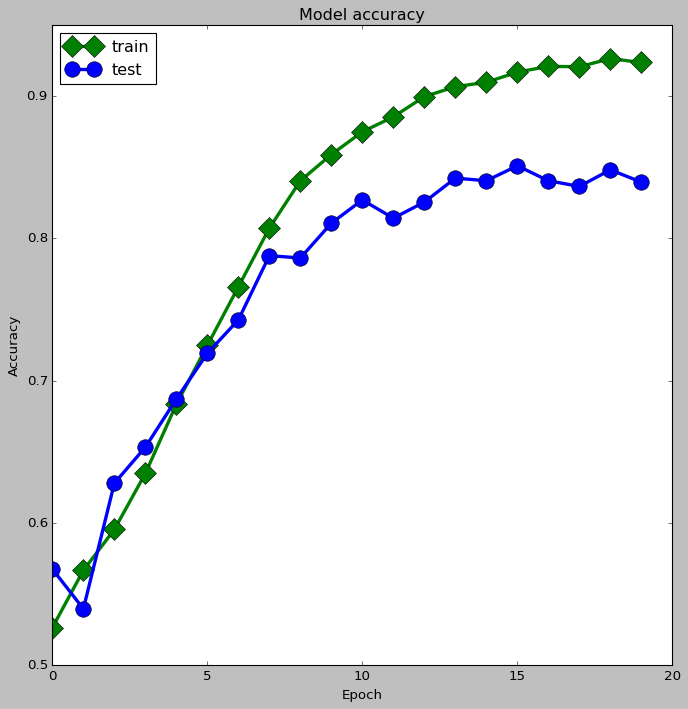

In [55]:
plt.style.use("classic")
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],color="green",marker="D",markersize=14,lw=3)
plt.plot(history.history['val_accuracy'],color="blue",marker="o",markersize=14,lw=3)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss Graph

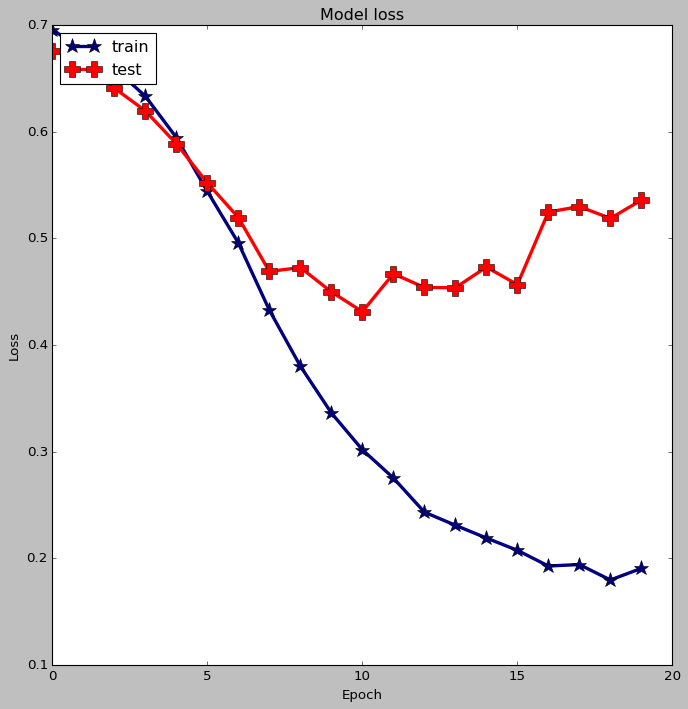

In [56]:
plt.style.use("classic")
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'],color="navy",marker="*",lw=3,markersize=14)
plt.plot(history.history['val_loss'],color="red",marker="P",lw=3,markersize=14)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
pred= model.predict([X_test_input,test_mask],batch_size=10)
final_pred = np.argmax(pred,axis=1)
accuracy_score(Y_test_label,final_pred)


0.8395

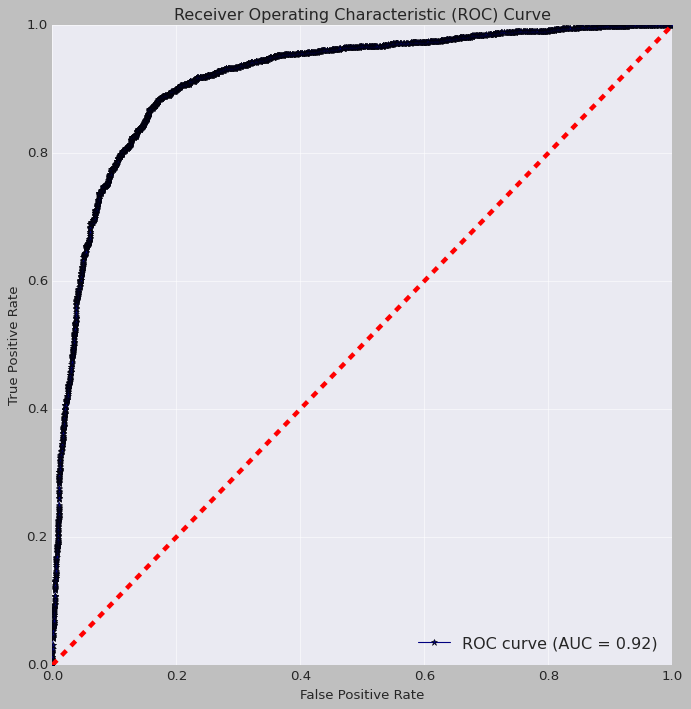

In [58]:

predicted_probabilities = pred[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test_label, predicted_probabilities)
auc_score = roc_auc_score(Y_test_label, predicted_probabilities)
plt.figure(figsize=(10,10))
plt.style.use("seaborn-darkgrid")
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score,color="navy",marker="*")
plt.plot([0, 1], [0, 1],lw=4,color="red",linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Confusion Matrix

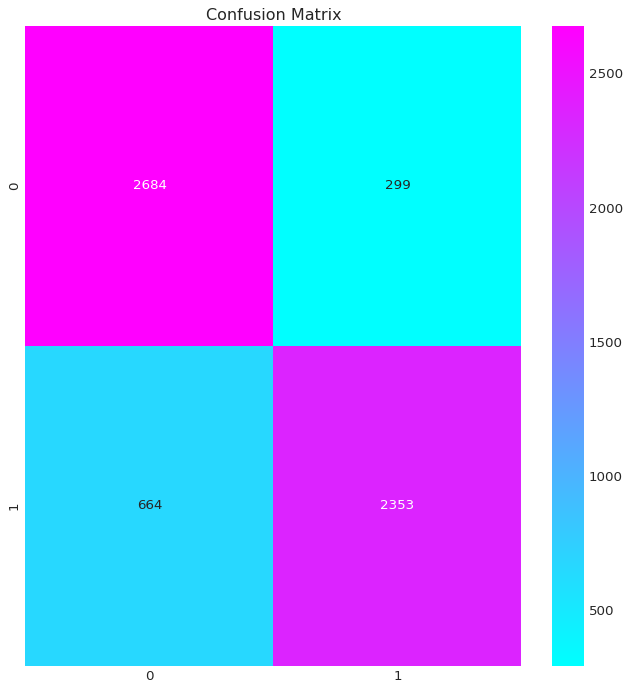

In [59]:
plt.figure(figsize=(10,10))
cm=confusion_matrix(Y_test_label,final_pred)
sn.heatmap(cm, annot=True, fmt='d',cmap="cool")
plt.title("Confusion Matrix")
plt.show()
                     

# Classification Report

In [60]:
print('Classification Report\n')
print(classification_report(Y_test_label,final_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      2983
           1       0.89      0.78      0.83      3017

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



# Custom Data Prediction 

In [61]:


x = ["নড়াইল থেকে ফিরে: গত ১০ অক্টোবর মধুমতী নদীর ওপর দেশের প্রথম ছয় লেনের মধুমতী সেতু উদ্বোধন করেন প্রধানমন্ত্রী শেখ হাসিনা। লোহাগড়া উপজেলার মধুমতী নদীর অংশে এ সেতু নির্মাণে কমেছে যশোর-নড়াইলের দূরত্ব"]

test_input = distil_bert_tokenizer.batch_encode_plus(x,add_special_tokens=True, max_length=40,pad_to_max_length=True, 
                                                     truncation=True)

test_input_ids = np.array(test_input['input_ids'])
test_input_mask = np.array(test_input['attention_mask'])

prediction = model.predict([test_input_ids, test_input_mask])
test_pred_label = np.argmax(prediction, axis=1)[0]

if test_pred_label == 0:
    print("News is Fake")
else:
    print("News is Real")


News is Fake
